In [12]:
# import all the libraries
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
from livelossplot import PlotLossesKeras
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [13]:
GOOGLE_COLAB = False
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
TEST_FILE = "text_file.txt"
MODEL_FILE = "model.h5"

In [14]:
# data Loading
path = ""
training_data_dir = path + "data/training"  # 10,000 data for each class
validation_data_dir = path + "data/validation"  # 2500 each for the classes
test_data_dir = path + "data/test"  # 12,500

In [15]:
# Hyper parameters
IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 32
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [16]:
# Mmodel 5

model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same',
                 input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(
    lr=0.0001), metrics=['accuracy'])

with open(MODEL_SUMMARY_FILE, 'w') as fh:
    model.summary(print_fn=lambda line: fh.write(line+"\n"))

C:\Users\taofe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., activation="relu", padding="same")`
  
C:\Users\taofe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\taofe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\taofe\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\taofe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to 

In [17]:
# data Augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [18]:
# Data preparation
training_generator = training_data_generator.flow_from_directory(training_data_dir, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT), batch_size=BATCH_SIZE,
                                                                 class_mode="binary")

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT), batch_size=BATCH_SIZE, class_mode="binary")

test_generator = test_data_generator.flow_from_directory(test_data_dir,
                                                         target_size=(
                                                             IMAGE_WIDTH, IMAGE_HEIGHT),
                                                         batch_size=1,
                                                         class_mode="binary",
                                                         shuffle=False)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


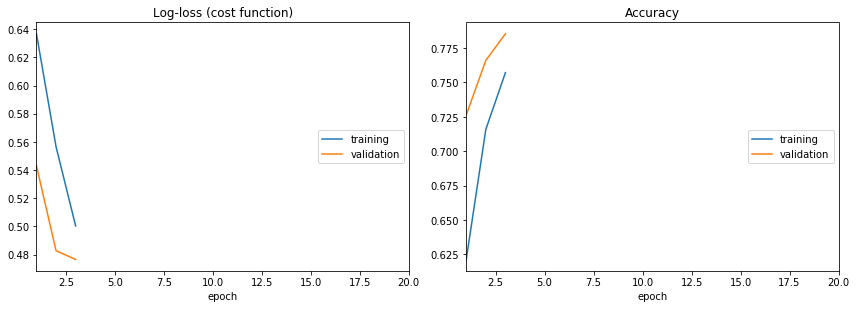

Log-loss (cost function):
training   (min:    0.500, max:    0.637, cur:    0.500)
validation (min:    0.477, max:    0.543, cur:    0.477)

Accuracy:
training   (min:    0.621, max:    0.757, cur:    0.757)
validation (min:    0.726, max:    0.785, cur:    0.785)
Epoch 4/20
589/625 [===========================>..] - ETA: 5:11 - loss: 0.4436 - acc: 0.7980

KeyboardInterrupt: 

In [19]:
# Training
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames)//BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames)//BATCH_SIZE,
    callbacks=[PlotLossesKeras(), CSVLogger(
        TRAINING_LOGS_FILE, append=False, separator=';')],
    verbose=1)

model.save_weights(MODEL_FILE)